In [117]:
import pandas as pd

In [118]:
costs = pd.read_csv('data/ue_costs_data.csv')
costs.head()

,cost_type,2022-01-01,2022-02-01,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01
0,back_office,6604.0,6174.0,5413.0,6731.0,5791.0,6821.0,5063.0,6309.0,5323.0,5132.0,5301.0,6885.0
1,factory_construction,12672.0,9423.7,13103.2,9538.1,12402.5,10402.7,9212.5,9664.6,12578.5,12674.2,10304.8,10271.8
2,logistics,904.0,702.0,843.0,950.0,795.0,589.0,949.0,863.0,681.0,867.0,800.0,637.0
3,manufacturing,7941.0,8995.0,8687.0,7929.0,8603.0,8614.0,7005.0,8647.0,8950.0,7938.0,7033.0,8555.0
4,marketing,2091.0,2351.0,2908.0,2657.0,2489.0,2848.0,2036.0,2507.0,2643.0,2813.0,2692.0,2869.0


<Axes: xlabel='months'>

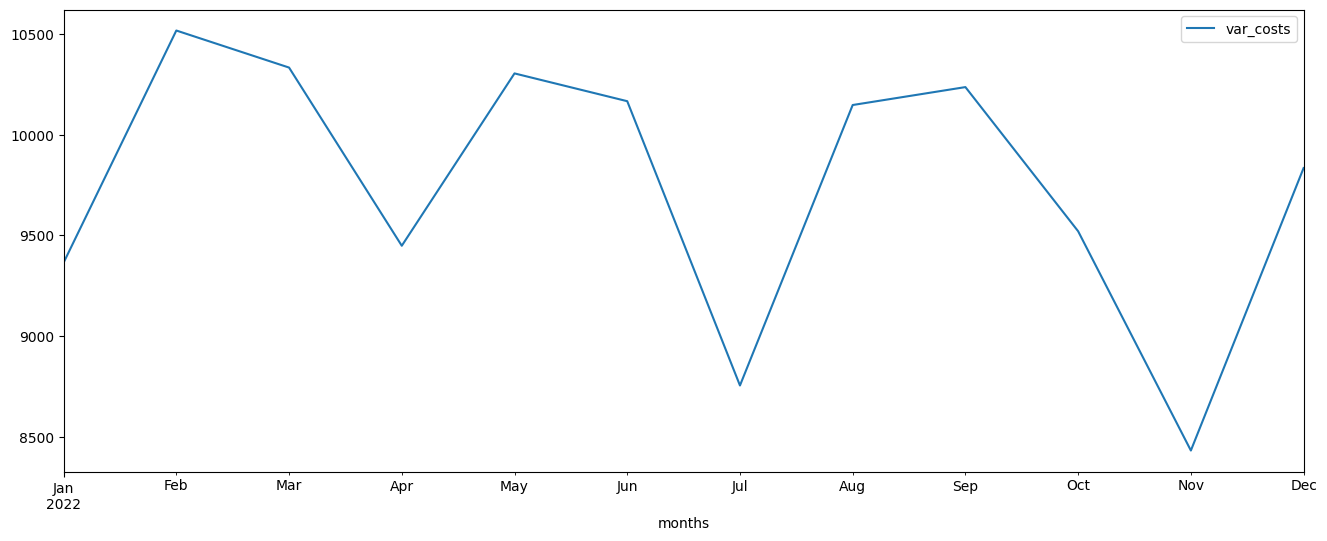

In [119]:
var_types = ['logistics', 'manufacturing', 'storing']

monthly_costs = (
    costs
    .melt(id_vars='cost_type', var_name='months', value_name='costs')
    .query('cost_type.isin(@var_types)')
    .groupby('months')
    .agg(var_costs = ('costs', 'sum'))
    .reset_index()
)

monthly_costs

monthly_costs.months = pd.to_datetime(monthly_costs.months).dt.to_period('M')
monthly_costs = monthly_costs.set_index('months')
monthly_costs.plot(figsize=(16,6))

In [120]:
monthly_costs

,var_costs
months,
2022-01,9365.0
2022-02,10518.0
2022-03,10334.0
2022-04,9449.0
2022-05,10305.0
2022-06,10167.0
2022-07,8755.0
2022-08,10148.0
2022-09,10237.0


In [121]:
orders = pd.read_csv('data/ue_orders_data.csv')
orders.head()

,order_id,order_date,order_amount,order_quantity,client_type
0,1,2022-01-01 00:00:00.000000000,95.4,4,corporate
1,2,2022-01-01 02:54:46.695565188,96.3,3,individual
2,3,2022-01-01 05:49:33.391130376,98.1,1,corporate
3,4,2022-01-01 08:44:20.086695565,92.7,3,corporate
4,5,2022-01-01 11:39:06.782260753,81.9,1,individual


In [122]:
orders.order_date = pd.to_datetime(orders.order_date) #перевели строку (object) в дату

In [123]:
# orders.order_date.dt.month #достаём параметры из даты

orders['order_month'] = orders.order_date.dt.to_period('M')  
#достаём параметр до месяца
orders


,order_id,order_date,order_amount,order_quantity,client_type,order_month
0,1,2022-01-01 00:00:00.000000000,95.4,4,corporate,2022-01
1,2,2022-01-01 02:54:46.695565188,96.3,3,individual,2022-01
2,3,2022-01-01 05:49:33.391130376,98.1,1,corporate,2022-01
3,4,2022-01-01 08:44:20.086695565,92.7,3,corporate,2022-01
4,5,2022-01-01 11:39:06.782260753,81.9,1,individual,2022-01
...,...,...,...,...,...,...
2995,2996,2022-12-30 12:20:53.217739248,86.4,2,corporate,2022-12
2996,2997,2022-12-30 15:15:39.913304436,88.2,1,corporate,2022-12
2997,2998,2022-12-30 18:10:26.608869624,91.8,4,corporate,2022-12
2998,2999,2022-12-30 21:05:13.304434812,81.9,3,individual,2022-12


<Axes: xlabel='order_month'>

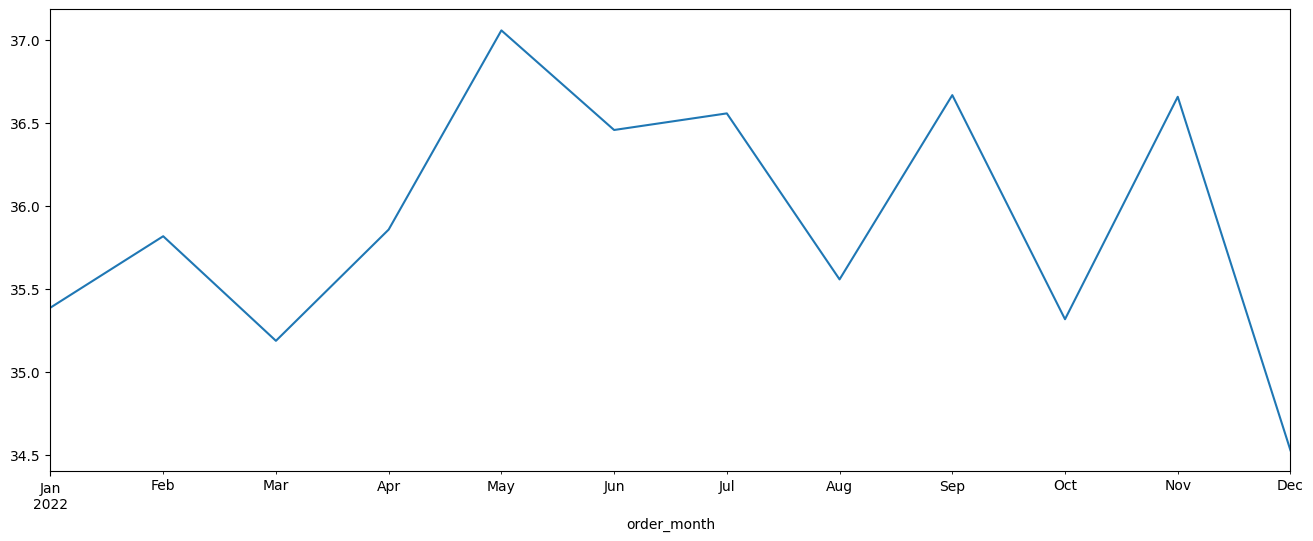

In [124]:
monthly_revenue = (
    orders
    .groupby('order_month')
    .agg(revenue = ('order_amount', 'sum'),
         orders = ('order_quantity', 'sum'))
)
monthly_revenue['rev_per_order'] = (
    monthly_revenue['revenue']/monthly_revenue['orders']).round(2)

monthly_revenue['rev_per_order'].plot(figsize=(16,6))


In [125]:
df = monthly_costs.join(monthly_revenue, how='outer')
df['cost_per_order'] = df['var_costs'] / df['orders']

#join это частный случай мердж если мы джоиним обе колонки по индексу
# она делает тоже самое, что merge

<Axes: xlabel='months'>

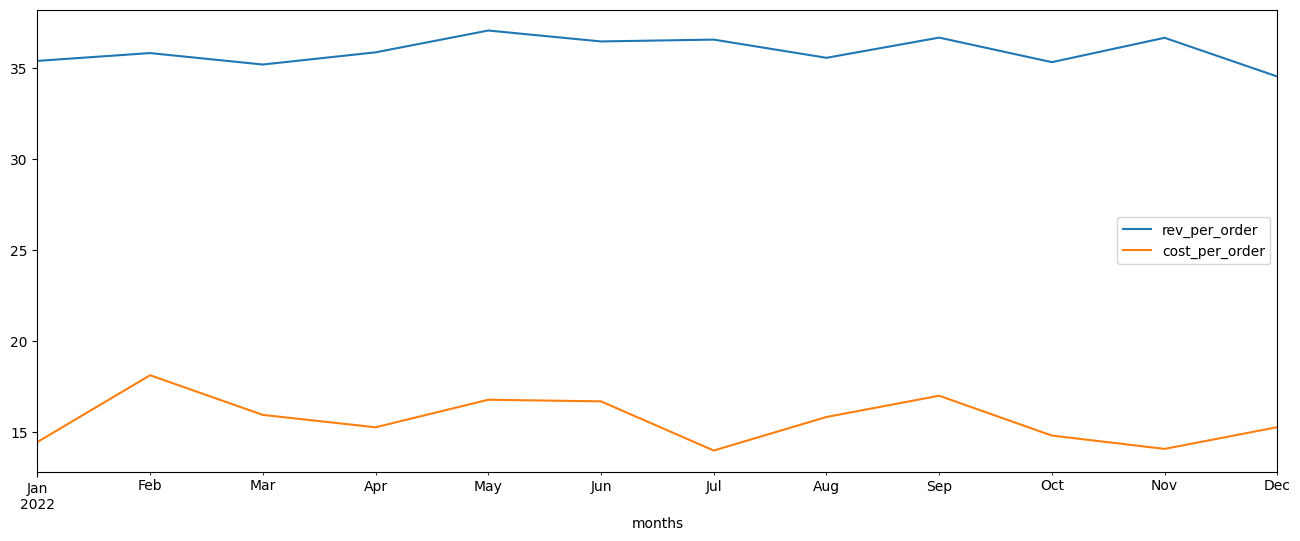

In [129]:
df[['rev_per_order', 'cost_per_order']].plot(figsize=(16,6))
